# Stock Market Prediction

In [75]:
#  import the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as data
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import yfinance as yf
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

#  for time series. 
plt.style.use('fivethirtyeight')
%matplotlib inline

In [76]:
#  download the dataset.

# stock = "POWERGRID.NS"
stock = "AAPL"
start = dt.datetime(2012, 11,11)
end = dt.datetime(2025, 2,2)

dataset = yf.download(stock, start, end)
dataset

[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open      Volume
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL
Date                                                                  
2012-11-12   16.498898   16.853599   16.371849   16.842960   515802000
2012-11-13   16.501028   16.731416   16.302249   16.379755   532949200
2012-11-14   16.318047   16.639314   16.296771   16.580045   477170400
2012-11-15   15.975816   16.397688   15.884634   16.337812   789910800
2012-11-16   16.038429   16.108944   15.371883   15.963051  1266893600
...                ...         ...         ...         ...         ...
2025-01-27  229.860001  232.149994  223.979996  224.020004    94863400
2025-01-28  238.259995  240.190002  230.809998  230.850006    75707600
2025-01-29  239.360001  239.860001  234.009995  234.119995    45486100
2025-01-30  237.589996  240.789993  237.210007  238.669998    55658300
2025-01-31  236.000000  247.190002  233.440002  247.190002   101075100

[3074 rows x 5 columns]

In [77]:
dataset.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [78]:
dataset.shape

(3074, 5)

In [79]:
dataset.tail()

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2025-01-27  229.860001  232.149994  223.979996  224.020004   94863400
2025-01-28  238.259995  240.190002  230.809998  230.850006   75707600
2025-01-29  239.360001  239.860001  234.009995  234.119995   45486100
2025-01-30  237.589996  240.789993  237.210007  238.669998   55658300
2025-01-31  236.000000  247.190002  233.440002  247.190002  101075100

In [80]:
dataset.head()

Price           Close       High        Low       Open      Volume
Ticker           AAPL       AAPL       AAPL       AAPL        AAPL
Date                                                              
2012-11-12  16.498898  16.853599  16.371849  16.842960   515802000
2012-11-13  16.501028  16.731416  16.302249  16.379755   532949200
2012-11-14  16.318047  16.639314  16.296771  16.580045   477170400
2012-11-15  15.975816  16.397688  15.884634  16.337812   789910800
2012-11-16  16.038429  16.108944  15.371883  15.963051  1266893600

In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3074 entries, 2012-11-12 to 2025-01-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   3074 non-null   float64
 1   (High, AAPL)    3074 non-null   float64
 2   (Low, AAPL)     3074 non-null   float64
 3   (Open, AAPL)    3074 non-null   float64
 4   (Volume, AAPL)  3074 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 144.1 KB


In [82]:
dataset.isnull().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [83]:
dataset.describe()

Price         Close         High          Low         Open        Volume
Ticker         AAPL         AAPL         AAPL         AAPL          AAPL
count   3074.000000  3074.000000  3074.000000  3074.000000  3.074000e+03
mean      81.742353    82.539699    80.863097    81.674977  1.568927e+08
std       67.414798    68.047312    66.695261    67.344893  1.325424e+08
min       11.939034    12.216316    11.773030    11.860771  2.323470e+07
25%       25.458800    25.692820    25.158809    25.404306  7.638525e+07
50%       45.649536    46.003852    45.194026    45.597483  1.133216e+08
75%      143.972511   145.506920   142.513284   143.632988  1.877828e+08
max      259.019989   260.100006   257.630005   258.190002  1.460852e+09

In [84]:
dataset = dataset.reset_index()

In [85]:
dataset.shape

(3074, 6)

In [86]:
dataset

Price        Date       Close        High         Low        Open      Volume
Ticker                   AAPL        AAPL        AAPL        AAPL        AAPL
0      2012-11-12   16.498898   16.853599   16.371849   16.842960   515802000
1      2012-11-13   16.501028   16.731416   16.302249   16.379755   532949200
2      2012-11-14   16.318047   16.639314   16.296771   16.580045   477170400
3      2012-11-15   15.975816   16.397688   15.884634   16.337812   789910800
4      2012-11-16   16.038429   16.108944   15.371883   15.963051  1266893600
...           ...         ...         ...         ...         ...         ...
3069   2025-01-27  229.860001  232.149994  223.979996  224.020004    94863400
3070   2025-01-28  238.259995  240.190002  230.809998  230.850006    75707600
3071   2025-01-29  239.360001  239.860001  234.009995  234.119995    45486100
3072   2025-01-30  237.589996  240.789993  237.210007  238.669998    55658300
3073   2025-01-31  236.000000  247.190002  233.440002  247.190002   101075100

[3074 rows x 6 columns]

In [87]:
dataset.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [88]:
dataset.to_csv("aapl.csv")

In [89]:
data01 = pd.read_csv("aapl.csv")

In [94]:
data01.head()

Price        Date               Close                High  \
0  Ticker         NaN                AAPL                AAPL   
1       0  2012-11-12  16.498897552490234  16.853598578662428   
2       1  2012-11-13  16.501028060913086  16.731415920594493   
3       2  2012-11-14   16.31804656982422  16.639313882236884   
4       3  2012-11-15  15.975815773010254    16.3976876278275   

                  Low                Open     Volume  
0                AAPL                AAPL       AAPL  
1   16.37184921453113   16.84295995025292  515802000  
2  16.302249301304784  16.379755145822354  532949200  
3  16.296770943614543  16.580045022864496  477170400  
4  15.884634236860744  16.337811649618274  789910800

In [98]:
#  Candlesticks 
import plotly.graph_objects as go

fig = go.Figure(data = [go.Candlestick(x = data01['Date'], open = data01['Open'], high =data01['High'], 
                                    low = data01['Low'],
                                      close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

In [93]:
 # dataset = dataset.drop(["Date"], axis = 1)

In [94]:
dataset

Price        Date       Close        High         Low        Open      Volume
Ticker                   AAPL        AAPL        AAPL        AAPL        AAPL
0      2012-11-12   16.498894   16.853595   16.371845   16.842956   515802000
1      2012-11-13   16.501026   16.731414   16.302247   16.379753   532949200
2      2012-11-14   16.318058   16.639326   16.296782   16.580057   477170400
3      2012-11-15   15.975817   16.397689   15.884635   16.337813   789910800
4      2012-11-16   16.038425   16.108940   15.371880   15.963048  1266893600
...           ...         ...         ...         ...         ...         ...
3069   2025-01-27  229.860001  232.149994  223.979996  224.020004    94863400
3070   2025-01-28  238.259995  240.190002  230.809998  230.850006    75707600
3071   2025-01-29  239.360001  239.860001  234.009995  234.119995    45486100
3072   2025-01-30  237.589996  240.789993  237.210007  238.669998    55658300
3073   2025-01-31  236.000000  247.190002  233.440002  247.190002   100959800

[3074 rows x 6 columns]

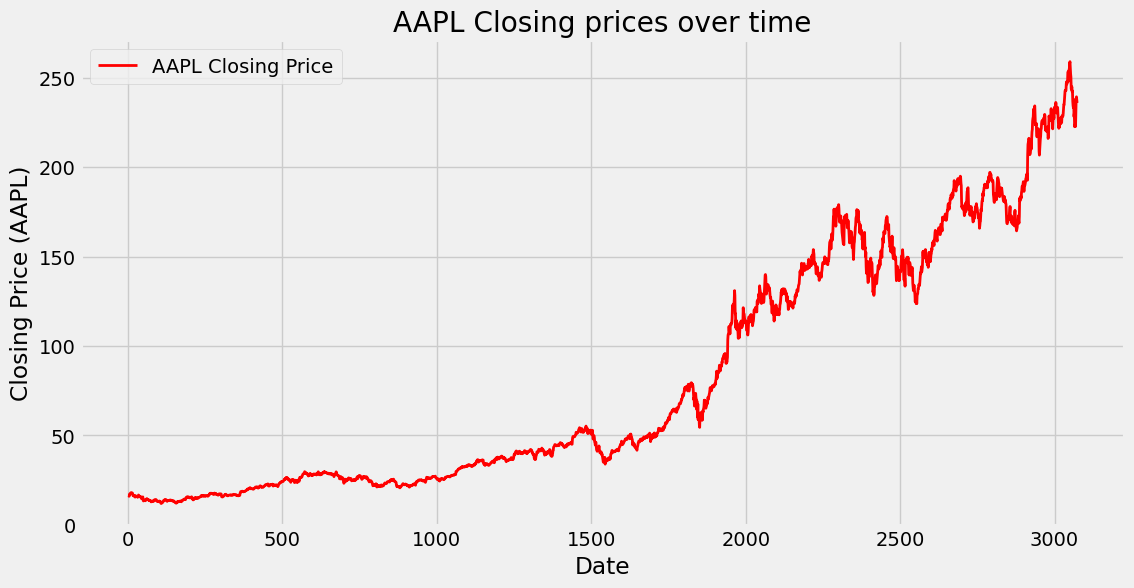

In [104]:
plt.figure(figsize=(12,6))
plt.plot(dataset.Close, label = f'{stock} Closing Price', linewidth = 2,color='red')
plt.title(f'{stock} Closing prices over time')
plt.xlabel('Date')
plt.ylabel('Closing Price (AAPL)')
plt.legend()
plt.show()

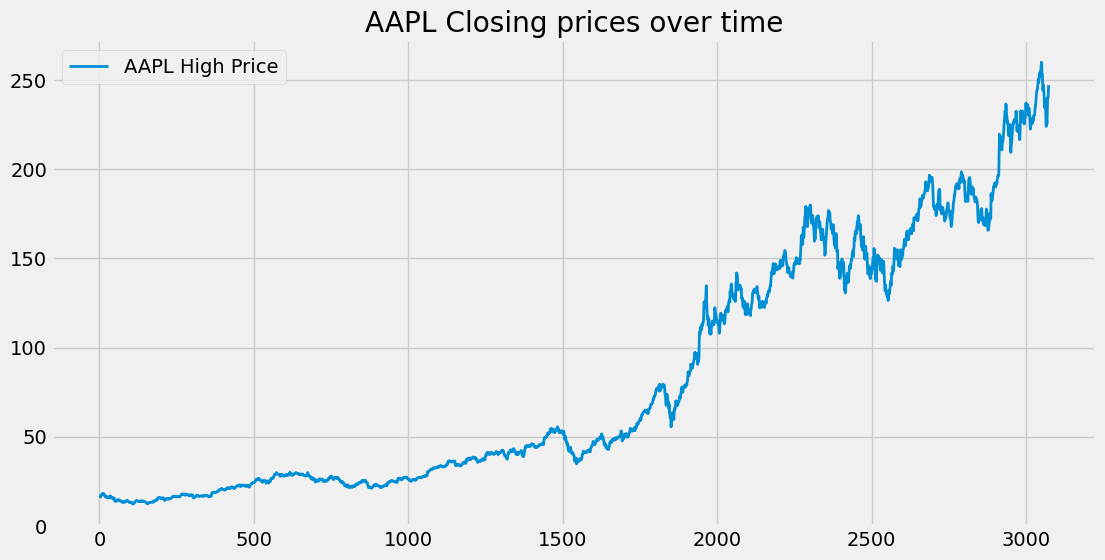

In [96]:
plt.figure(figsize=(12,6))
plt.plot(dataset.High, label = f'{stock} High Price', linewidth = 2)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

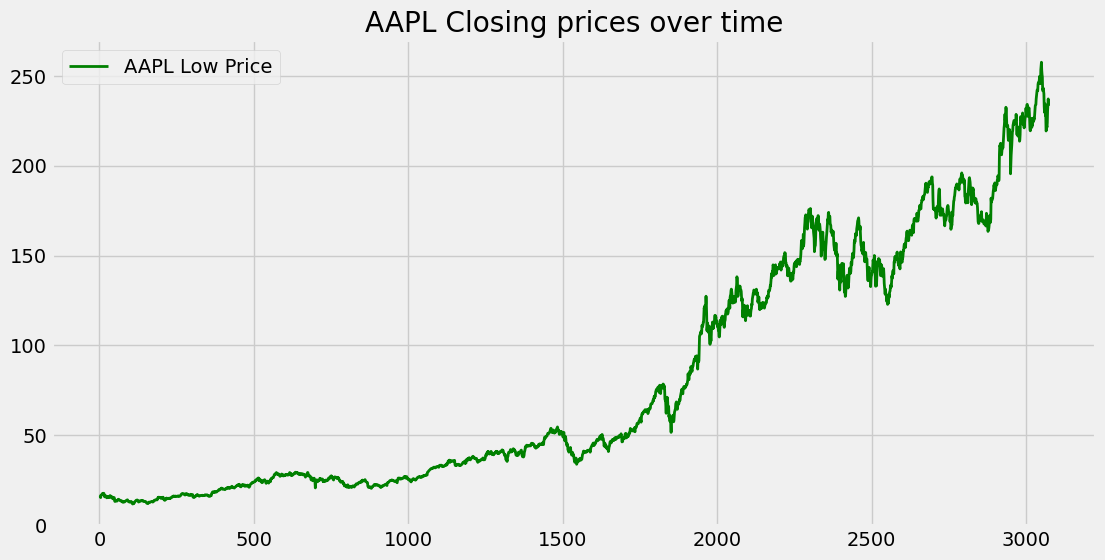

In [97]:
plt.figure(figsize=(12,6))
plt.plot(dataset.Low, label = f'{stock} Low Price', linewidth = 2, color='green')
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

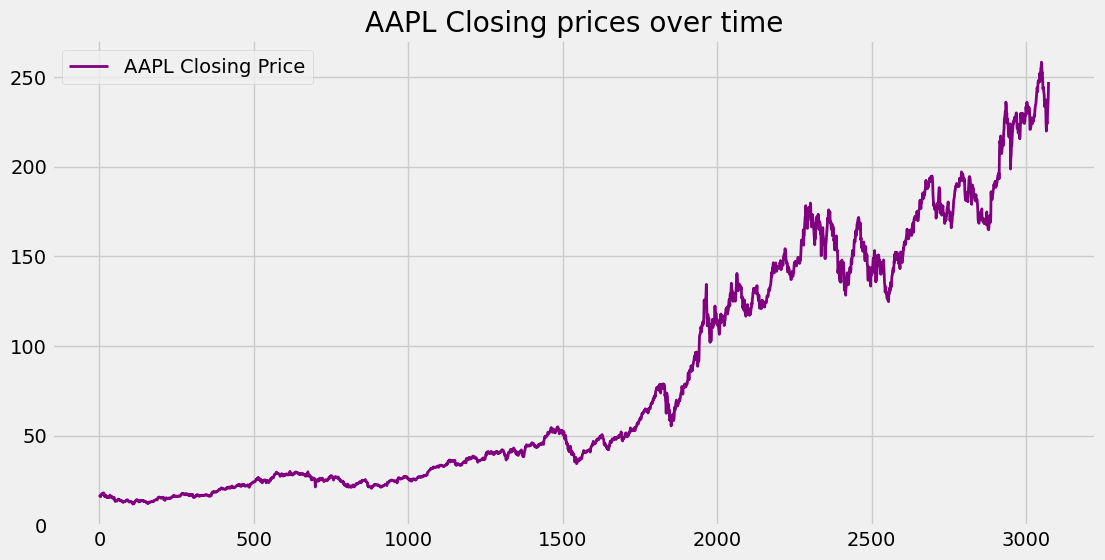

In [98]:
plt.figure(figsize=(12,6))
plt.plot(dataset.Open, label = f'{stock} Closing Price', linewidth = 2, color = "purple")
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

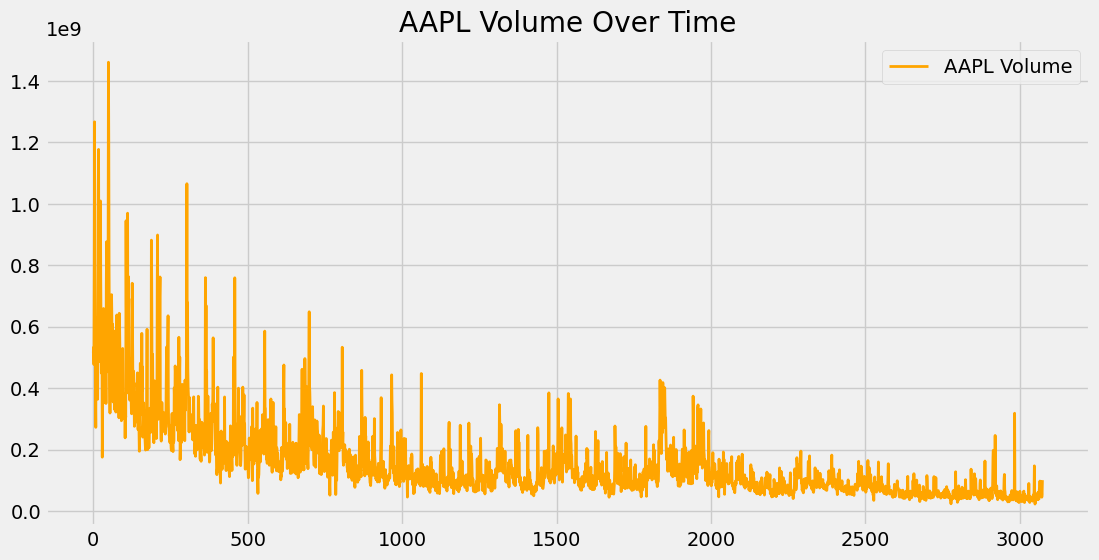

In [99]:
plt.figure(figsize=(12,6))
plt.plot(dataset.Volume, label = f'{stock} Volume', linewidth = 2, color='orange')
plt.title(f'{stock} Volume Over Time')
plt.legend()
plt.show()

In [107]:
 # Moving Average 
# [10,20,30,40,50,60,70,80,90]
# moving average for last 5 days -> null null null null

temp_data = [10,20,30,40,50,60,70,80,90]
print(sum(temp_data[0:5]) / 5)

30.0


In [108]:

df01 = pd.DataFrame(temp_data)

In [111]:
df01.rolling(5).mean()

0
0   NaN
1   NaN
2   NaN
3   NaN
4  30.0
5  40.0
6  50.0
7  60.0
8  70.0

In [121]:
ma100 = dataset.Close.rolling(100).mean()
ma200 = dataset.Close.rolling(200).mean()

In [127]:
dataset.Close.rolling(100).mean()

Ticker        AAPL
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
...            ...
3069    232.870074
3070    233.027422
3071    233.214949
3072    233.369493
3073    233.523720

[3074 rows x 1 columns]

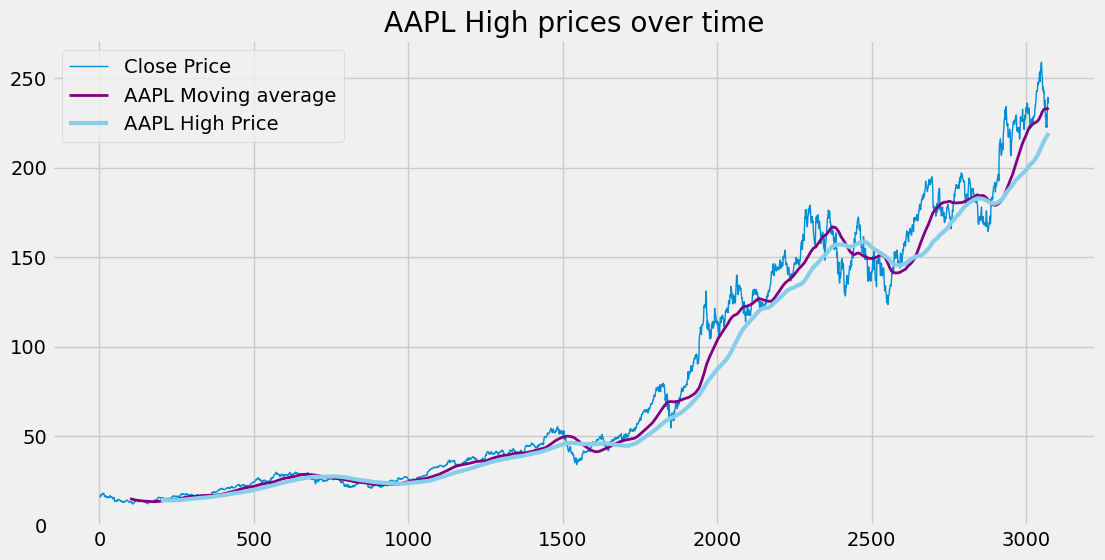

In [123]:
plt.figure(figsize=(12,6))
plt.plot(dataset.Close, label = 'Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving average', linewidth = 2, color = "purple")
plt.plot(ma200, label = f'{stock} High Price', linewidth = 3, color = "skyblue")
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

In [128]:
ema100 = dataset.Close.ewm(span = 100, adjust = False).mean()

In [129]:
ema200 = dataset.Close.ewm(span = 200, adjust = False).mean()

In [130]:
# dataset.pct_change()

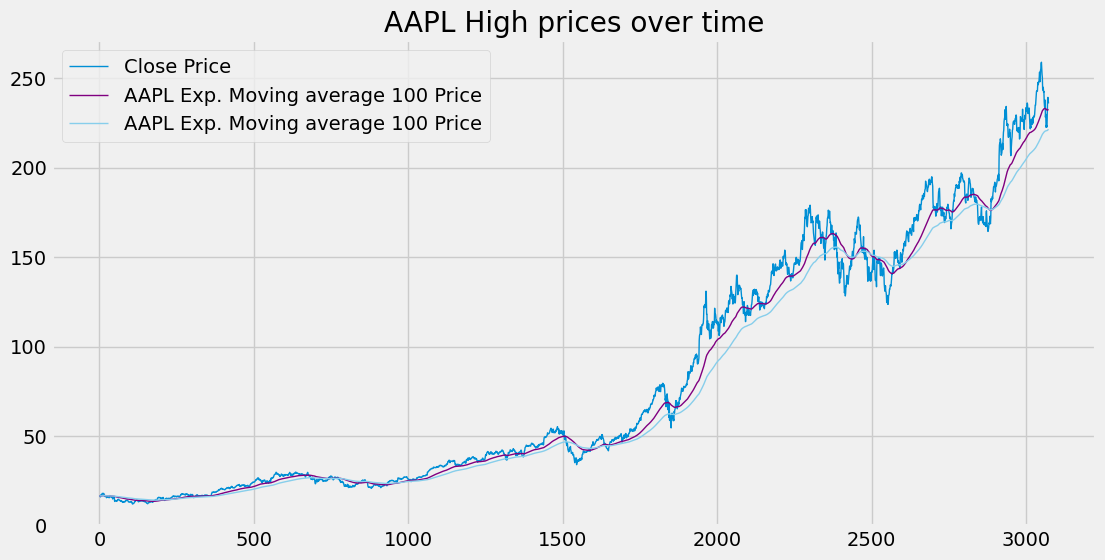

In [131]:
plt.figure(figsize=(12,6))
plt.plot(dataset.Close, label = 'Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving average 100 Price', linewidth = 1, color = "purple")
plt.plot(ema200, label = f'{stock} Exp. Moving average 100 Price', linewidth = 1, color = "skyblue")
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

In [138]:
# LSTM OVER RNN
# LSTM:- Long short term memory
# RNN:- Recurrent Neural Network

## Divide the data into the training and testing.

In [139]:
# data_training = pd.DataFrame(dataset['Close'][0:int(len(dataset)*0.70)])
# data_testing = pd.DataFrame(dataset['Close'][int(len(dataset)*0.70): int(len(dataset))])


data_training = pd.DataFrame(dataset["Close"][0 : int(len(dataset) * 0.70)])
data_testing = pd.DataFrame(dataset["Close"][int(len(dataset) * 0.70) : int(len(dataset))])

In [140]:
data_training

Ticker        AAPL
0        16.498898
1        16.501028
2        16.318047
3        15.975816
4        16.038429
...            ...
2146    124.682503
2147    124.486320
2148    124.437271
2149    122.897125
2150    122.239876

[2151 rows x 1 columns]

In [141]:
data_testing.shape

(923, 1)

In [142]:
scaler = MinMaxScaler(feature_range = (0,1))

In [143]:
data_training_array = scaler.fit_transform(data_training)

In [147]:
# data_training_array.shape[0]
data_training_array.shape

(2151, 1)

In [170]:
# LSTM requires sequences, so this code creates overlapping sequences of 100 days.
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [171]:
x_train.shape

(2051, 100, 1)

In [172]:
y_train.shape

(2051,)

In [2]:
x_train.shape

NameError: name 'x_train' is not defined

## Model Sequential Model.

## LSTM Input -> 3D Array ( batch_size, time_steps, seq_len)
LSTM 2D OR 3D

If 2D -> (batch_sizem units)
If 3D -> (batch_size, time_steps, units)

In [181]:
model = Sequential()

In [182]:
model.add(LSTM(units = 50, input_shape = (x_train.shape[1],1), activation = "relu", return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = "relu", return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = "relu", return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [121]:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [194]:
# model.compile(optimizer = 'adam', loss = "mean_squared_error")
# model.fit(x_train, y_train, epochs = 10)

Epoch 1/10



KeyboardInterrupt



In [195]:
past_100_days = data_training.tail(100)

In [196]:
past_100_days.head()

Ticker        AAPL
2051    123.796455
2052    128.020798
2053    129.125778
2054    126.123718
2055    125.947723

In [197]:
# It combines past_100_days and data_testing row-wise (i.e., it stacks data_testing below past_100_days).
final_dataframe = pd.concat([past_100_days, data_testing], ignore_index=True)

# final_dataframe.head(60)

In [198]:
input_data = scaler.fit_transform(final_dataframe)    # Test Data

In [199]:
# LSTM requires sequences, so this code creates overlapping sequences of 100 days.
x_test = []    
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [200]:
y_predicted = model.predict(x_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step


In [201]:
y_predicted.shape

(923, 1)

In [202]:
scaler.scale_

array([0.00689338])

In [206]:
# Converts scaled predictions back to actual stock prices.
scaler_factor = 1 / 1.10669685039
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

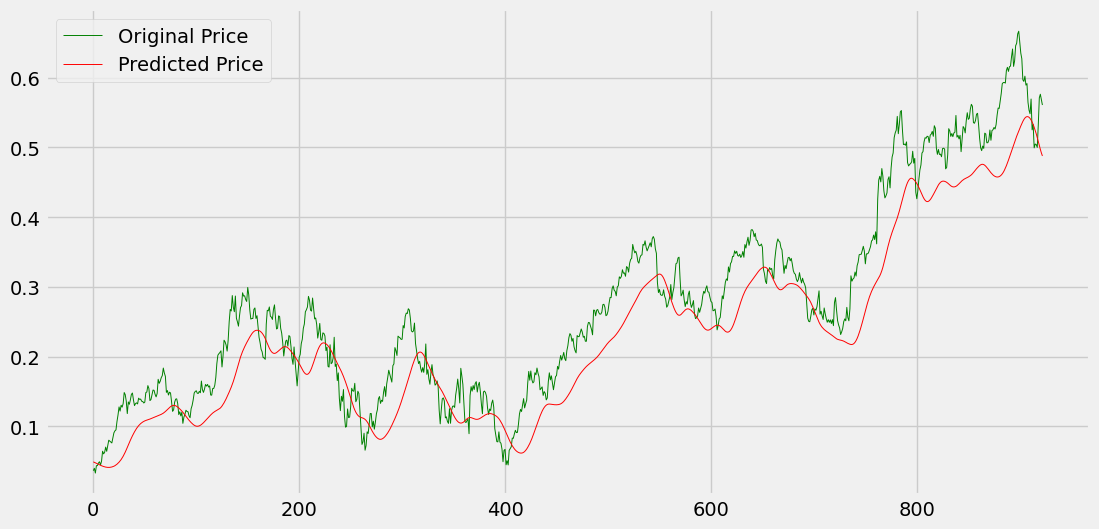

In [207]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label = 'Original Price', linewidth = 0.7, color = "green")
plt.plot(y_predicted, label = "Predicted Price", color = "red", linewidth = 0.7)
plt.legend()
plt.show()

In [208]:
model.save("Stock_model.keras")